## Daily News for Stock Market Prediction

  ### 8 years daily news headlines to predict stock market movement
  
### Introduction:

News is getting delayed to the public and professional traders react to the market news very fast before the real numbers are released. 
Controlling manipulators is a big task in the market. The information leakage on trading behavior and market efficiency will lead to high stock fluctuation before the public announcement.

A single-predictor model fails to beat the prediction of stock returns. So here I am applying `Time-series Analysis`, `Recurrent Neural Networks`, and `Natural Language Processing` to predict.
The goal is to improve the accuracy of stock return forecasts by combining new technical indicators and news.

data collection : https://www.kaggle.com/aaron7sun/stocknews/code

   ######  Data Wrangling
     - Load the data, Check the missing values, Join the columns
     
   ######  Exploratory Data Analysis
      - Study the features, summarize and visualize the main characteristics.

In [149]:
#import the necessary module.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

import os
from library.sb_utils import save_file
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 5)
from statsmodels.graphics.tsaplots import plot_acf
import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from math import sqrt

# import the necessary module for Text data cleaning(NLP)
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import spacy
import string
string.punctuation
import re
import warnings
warnings.filterwarnings("ignore")
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\archu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\archu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Data Wrangling Dataset 1: 
   #### stock news - Dow Jones Industrial Average

In [150]:
news = pd.read_csv("./Combined_News_DJIA.csv")
news.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

#### Observations: 
 - `Top1` to `Top25` are the news articles in decreasing order of their priority.


In [151]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [152]:
news.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

`Note`: We have null values for columns - `Top23`, `Top24`, and `Top25`. Remove the null values and check it again. Make sure all the null values are cleared.

In [154]:
news.dropna(inplace= True)
news.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

In [155]:
news['Date'].min(), news['Date'].max()

('2008-08-08', '2016-07-01')

-  note: The data set is Using 8 years daily news headlines to predict stock market movement

In [156]:
news['Date'].dtype

dtype('O')

In [157]:
# Change the Date to a datetime data type and set the index of dataset to Date 

news['Date'] = pd.to_datetime(news['Date'])

news = news.set_index('Date')

In [158]:
news.index

DatetimeIndex(['2008-08-08', '2008-08-11', '2008-08-12', '2008-08-13',
               '2008-08-14', '2008-08-15', '2008-08-18', '2008-08-19',
               '2008-08-20', '2008-08-21',
               ...
               '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23',
               '2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29',
               '2016-06-30', '2016-07-01'],
              dtype='datetime64[ns]', name='Date', length=1986, freq=None)

#### Removal of Punctuation
To remove the punctuation in our dataset, let’s create a function and apply the function to the dataset:

In [161]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
news['Top_news']=news['Top1'].apply(lambda x: remove_punctuation(x))
news.head(1)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Top_news
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",bGeorgia downs two Russian warplanes as countr...


#### Observation:
        There are many html tags which should be removed to avoid any biases.

In [162]:
columns = ['Top1']

In [163]:
news['combined_news'] = news[columns].apply(lambda row:'.'.join(row.values.astype(str)), axis=1)

In [165]:
news = news.replace('b\"|b\'|\\\\|\\\"', '', regex=True)
news.head(1)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Top_news,combined_news
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,Georgian troops retreat from S. Osettain capit...,...,Condoleezza Rice: The US would not act to prev...,This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Osse...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge,bGeorgia downs two Russian warplanes as countr...,Georgia 'downs two Russian warplanes' as count...


note: The column after step 1 has removed the punctuations from the title texts

In [166]:
text = news["combined_news"]
text.head(10)

Date
2008-08-08    Georgia 'downs two Russian warplanes' as count...
2008-08-11    Why wont America and Nato help us? If they won...
2008-08-12    Remember that adorable 9-year-old who sang at ...
2008-08-13     U.S. refuses Israel weapons to attack Iran: r...
2008-08-14    All the experts admit that we should legalise ...
2008-08-15    Mom of missing gay man: Too bad he's not a 21-...
2008-08-18    In an Afghan prison, the majority of female pr...
2008-08-19    Man arrested and locked up for five hours afte...
2008-08-20    Two elderly Chinese women have been sentenced ...
2008-08-21    British resident held in Guantanamo Bay wins l...
Name: combined_news, dtype: object

#### Tokenizing 
Tokenizing is the process of splitting strings into a list of words. We will make use of Regular Expressions or regex to do the splitting. Here “\W+” splits on one or more non-word character

In [169]:
def tokenize(text):
    split=re.split("\W+",text) 
    return split
news['combined_news_split']=news['combined_news'].apply(lambda x: tokenize(x.lower()))
news.head(3)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Top_news,combined_news,combined_news_split
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,Georgian troops retreat from S. Osettain capit...,...,This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Osse...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge,bGeorgia downs two Russian warplanes as countr...,Georgia 'downs two Russian warplanes' as count...,"[georgia, downs, two, russian, warplanes, as, ..."
2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict',Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,Olympic opening ceremony fireworks 'faked',What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,Welcome To World War IV! Now In High Definition!',...,China to overtake US as largest manufacturer',War in South Ossetia [PICS]',Israeli Physicians Group Condemns State Torture',Russia has just beaten the United States over...,Perhaps *the* question about the Georgia - Rus...,Russia is so much better at war',So this is what it's come to: trading sex for ...,bWhy wont America and Nato help us If they won...,Why wont America and Nato help us? If they won...,"[why, wont, america, and, nato, help, us, if, ..."
2008-08-12,0,Remember that adorable 9-year-old who sang at ...,Russia 'ends Georgia operation',If we had no sexual harassment we would have n...,Al-Qa'eda is losing support in Iraq because of...,Ceasefire in Georgia: Putin Outmaneuvers the W...,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo-Georgian War and the Balan...,I'm Trying to Get a Sense of This Whole Georgi...,The US military was surprised by the timing an...,...,"Russia, Georgia, and NATO: Cold War Two'",Remember that adorable 62-year-old who led you...,War in Georgia: The Israeli connection',All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?',BBC NEWS | Asia-Pacific | Extinction 'by man n...,bRemember that adorable 9yearold who sang at t...,Remember that adorable 9-year-old who sang at ...,"[remember, that, adorable, 9, year, old, who, ..."


#### Stop words:
   Now, we have a list of words without any punctuation. Let’s go ahead and remove the stop words. Stop words are irrelevant words that won’t help in identifying a text. We will use `“nltk”` library for stop-words and there are `179` stop words in this library. Let's remove the unnecessary stop words.

In [170]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [171]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
news['combined_news_split_wo_stopwords'] = news['combined_news_split'].apply(lambda x: remove_stopwords(x))
news.head(1)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top20,Top21,Top22,Top23,Top24,Top25,Top_news,combined_news,combined_news_split,combined_news_split_wo_stopwords
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-08,0,Georgia 'downs two Russian warplanes' as count...,BREAKING: Musharraf to be impeached.',Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with 'impunity,' U.N. of...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The 'enemy combatent' trials are nothing but a...,Georgian troops retreat from S. Osettain capit...,...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Osse...,Indian shoe manufactory - And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,No Help for Mexico's Kidnapping Surge,bGeorgia downs two Russian warplanes as countr...,Georgia 'downs two Russian warplanes' as count...,"[georgia, downs, two, russian, warplanes, as, ...","[georgia, downs, two, russian, warplanes, coun..."


In [172]:
text = news["combined_news_split_wo_stopwords"]
text.head(10)

Date
2008-08-08    [georgia, downs, two, russian, warplanes, coun...
2008-08-11    [wont, america, nato, help, us, wont, help, us...
2008-08-12    [remember, adorable, 9, year, old, sang, openi...
2008-08-13    [, u, refuses, israel, weapons, attack, iran, ...
2008-08-14                  [experts, admit, legalise, drugs, ]
2008-08-15    [mom, missing, gay, man, bad, 21, year, old, c...
2008-08-18    [afghan, prison, majority, female, prisoners, ...
2008-08-19    [man, arrested, locked, five, hours, taking, p...
2008-08-20    [two, elderly, chinese, women, sentenced, year...
2008-08-21    [british, resident, held, guantanamo, bay, win...
Name: combined_news_split_wo_stopwords, dtype: object

#### Lemmatize/ Stem:
Stemming and Lemmatizing is the process of reducing a word to its root form. The main purpose is to reduce variations of the same word, thereby reducing the corpus of words we include in the model. The difference between stemming and lemmatizing is that, stemming chops off the end of the word without taking into consideration the context of the word. Whereas, Lemmatizing considers the context of the word and shortens the word into its root form based on the dictionary definition. Stemming is a faster process compared to Lemmantizing. Hence, it a trade-off between speed and accuracy.

Lemmatization / Stemming

 - Shorten words to their root stems

In [173]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
news["Top_News_lemmatized"] = news["combined_news_split_wo_stopwords"].apply(lemmatize_word)
news["Top_News_lemmatized"][1]

'wont america nato help u wont help u help iraq '

In [174]:
news_grouped=news[['Label','Top_News_lemmatized']].groupby(by='Label').agg(lambda x:' '.join(x))
news_grouped

,Top_News_lemmatized
Label,
0,georgia down two russian warplane country move...
1,wont america nato help u wont help u help iraq...


In [175]:
news_new_up = news[news['Label']==1].copy()
news_new_down =news[news['Label']==0].copy()

In [176]:
print(news_new_up[:2])
print(news_new_down[:2])

            Label                                               Top1  \
Date                                                                   
2008-08-11      1  Why wont America and Nato help us? If they won...   
2008-08-14      1  All the experts admit that we should legalise ...   

                                                         Top2  \
Date                                                            
2008-08-11          Bush puts foot down on Georgian conflict'   
2008-08-14  War in South Osetia - 89 pictures made by a Ru...   

                                                         Top3  \
Date                                                            
2008-08-11  Jewish Georgian minister: Thanks to Israeli tr...   
2008-08-14  Swedish wrestler Ara Abrahamian throws away me...   

                                                         Top4  \
Date                                                            
2008-08-11  Georgian army flees in disarray as Russians ad.

In [177]:
# To see number of data for each label (0, 1)
news.groupby('Label').count()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top21,Top22,Top23,Top24,Top25,Top_news,combined_news,combined_news_split,combined_news_split_wo_stopwords,Top_News_lemmatized
Label,,,,,,,,,,,,,,,,,,,,,
0,924,924,924,924,924,924,924,924,924,924,...,924,924,924,924,924,924,924,924,924,924
1,1062,1062,1062,1062,1062,1062,1062,1062,1062,1062,...,1062,1062,1062,1062,1062,1062,1062,1062,1062,1062


####  Observation: 
    separated the lists based on labels and it gives the clear picture of the columns.


### Data Wrangling - Dataset 2:

  #### Dow Jones Industrial Average -Stock Price



In [208]:
DJIA_table = pd.read_csv('./upload_DJIA_table.csv')

DJIA_table['Date'] = pd.to_datetime(DJIA_table['Date'], format='%Y-%m-%d')


In [209]:
DJIA_table = DJIA_table.set_index('Date')
DJIA_table.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


#### Adjusted Closing Price
 
Stock values are stated in terms of the closing price and the adjusted closing price. 

The `closing price` is the raw price, which is just the cash value of the last transacted price before the market closes. The `adjusted closing price` factors in anything that might affect the stock price after the market closes.


In [210]:
type(DJIA_table)

pandas.core.frame.DataFrame

In [211]:
DJIA_table.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1989 entries, 2016-07-01 to 2008-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1989 non-null   float64
 1   High       1989 non-null   float64
 2   Low        1989 non-null   float64
 3   Close      1989 non-null   float64
 4   Volume     1989 non-null   int64  
 5   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 108.8 KB


In [212]:
DJIA_table.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

 - Note: The stock price data does not have any null values. 

#### Join the data set
Merge `DJIA_table` and `DJIA_table` and store it as new variable called `DJIA_df`

In [213]:
DJIA_df = DJIA_table.merge(news, on='Date', 
                            how='inner', indicator=False)
DJIA_df.head(1)

,Open,High,Low,Close,Volume,Adj Close,Label,Top1,Top2,Top3,...,Top21,Top22,Top23,Top24,Top25,Top_news,combined_news,combined_news_split,combined_news_split_wo_stopwords,Top_News_lemmatized
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,1,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...,A 117yearold woman in Mexico City finally rece...,A 117-year-old woman in Mexico City finally re...,"[a, 117, year, old, woman, in, mexico, city, f...","[117, year, old, woman, mexico, city, finally,...",117 year old woman mexico city finally receive...


In [214]:
DJIA_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1986 entries, 2016-07-01 to 2008-08-08
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Open                              1986 non-null   float64
 1   High                              1986 non-null   float64
 2   Low                               1986 non-null   float64
 3   Close                             1986 non-null   float64
 4   Volume                            1986 non-null   int64  
 5   Adj Close                         1986 non-null   float64
 6   Label                             1986 non-null   int64  
 7   Top1                              1986 non-null   object 
 8   Top2                              1986 non-null   object 
 9   Top3                              1986 non-null   object 
 10  Top4                              1986 non-null   object 
 11  Top5                              1986 non-null   o

In [215]:
# shape
DJIA_df.shape

(1986, 37)

 - note: There are 1986 observations (rows) and 32 features (columns) including one Label feature starting 2008 to 2016

In [216]:
#sort the data
DJIA_df = DJIA_df.sort_index(ascending=True)
DJIA_df.index

DatetimeIndex(['2008-08-08', '2008-08-11', '2008-08-12', '2008-08-13',
               '2008-08-14', '2008-08-15', '2008-08-18', '2008-08-19',
               '2008-08-20', '2008-08-21',
               ...
               '2016-06-20', '2016-06-21', '2016-06-22', '2016-06-23',
               '2016-06-24', '2016-06-27', '2016-06-28', '2016-06-29',
               '2016-06-30', '2016-07-01'],
              dtype='datetime64[ns]', name='Date', length=1986, freq=None)

## Exloratory Data Analysis


#### Plot Dow Jones Industrial Average -Stock Price

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

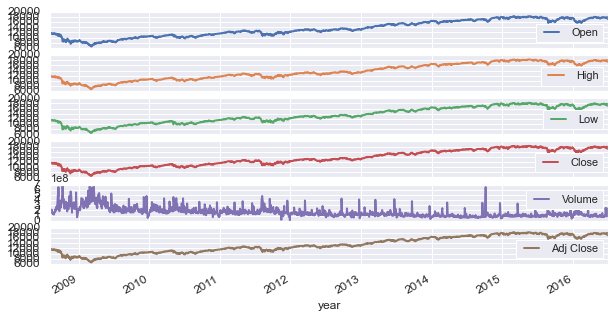

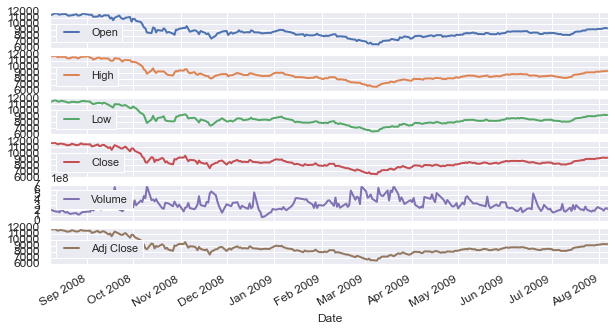

In [217]:
DJIA_table.plot(linewidth=2, fontsize=12,subplots=True)
plt.xlabel("year")
#plt.ylabel("Adjusted Closing Price")
filtered_df = DJIA_table.loc[(DJIA_table.index <= '2009-08-08')]
filtered_df.count()
filtered_df.plot(linewidth=2, fontsize=12, subplots=True)

In [218]:
price_returns = DJIA_table.sort_values(by="Date", ascending=True, axis=0)
price_returns['Daily_Returns'] = price_returns['Adj Close'].pct_change()
price_returns.head()

,Open,High,Low,Close,Volume,Adj Close,Daily_Returns
Date,,,,,,,
2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,NaN
2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.004093
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,-0.011872
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,-0.009406
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.007194


In [219]:
column_plot = ['Adj Close', 'Daily_Returns', 'Volume']

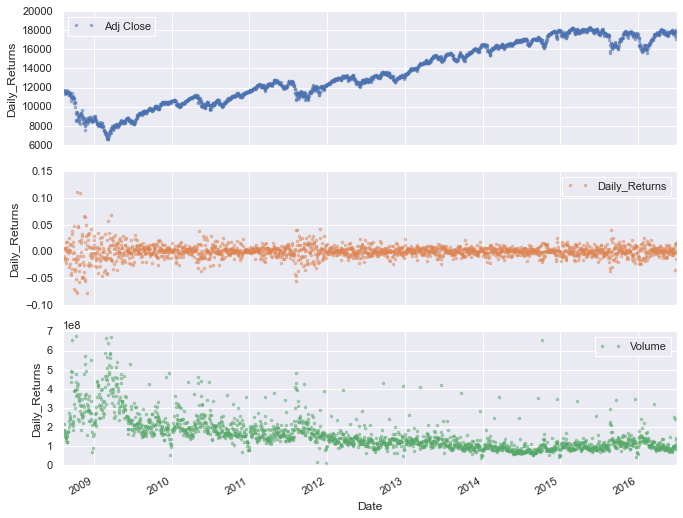

In [220]:
axes = price_returns[column_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily_Returns')

Text(0, 0.5, 'Adj Close')

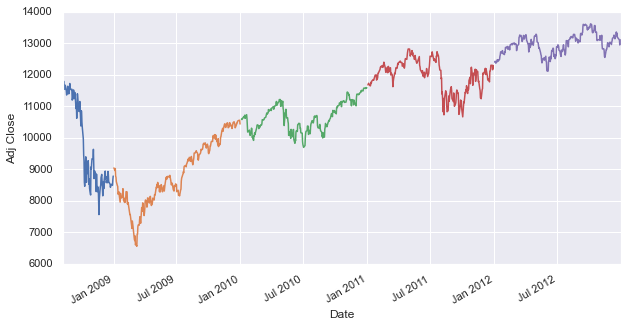

In [221]:
# Zoom in to a year
#Plot for 2009
mplot = price_returns.loc['2008', 'Adj Close'].plot()
mplot = price_returns.loc['2009', 'Adj Close'].plot()
mplot = price_returns.loc['2010', 'Adj Close'].plot()
mplot = price_returns.loc['2011', 'Adj Close'].plot()
mplot = price_returns.loc['2012', 'Adj Close'].plot()

mplot.set_ylabel('Adj Close')

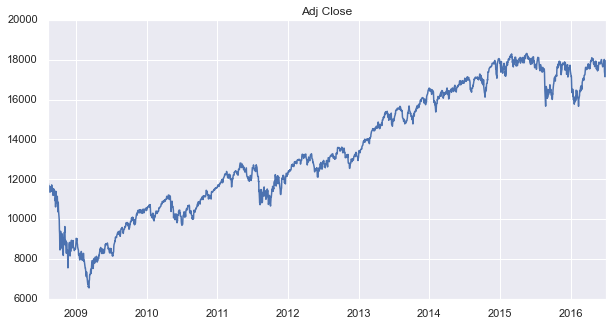

In [223]:
# Let's plot our dataset for Adj Close price
plt.plot(DJIA_table['Adj Close'])
plt.title('Adj Close');

### Visualize multiple time series

If there are multiple time series in a single DataFrame, wecan use the `.plot()` method to plot a line chart of all the time series. Another interesting way to plot these is to use area charts `.plot.area()`. Area charts are commonly used when dealing with multiple time series, and can be used to display cumulated totals.


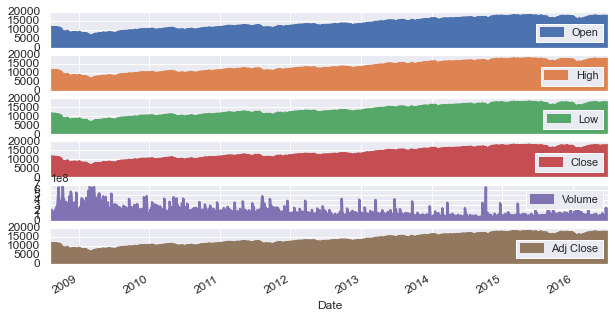

In [224]:
# Plot time series area in the original dataset stock price - DJIA_table
ax = DJIA_table.plot.area(linewidth=2, fontsize=12, subplots=True);

In [225]:
correlation_change = price_returns["Adj Close"].corr(price_returns["Daily_Returns"])
print("correlation of changes ", correlation_change)

correlation of changes  0.023023497717720134


In [226]:
autocorrelation = price_returns["Daily_Returns"].autocorr()
print('The auto correlation of weekly returns is %4.2f' % (autocorrelation))

The auto correlation of weekly returns is -0.10


#### Observation:
 Notice how the autocorrelation of returns for stock `Adj Close` is negative, so the stock is 'mean reverting' and close to zero.

###  Statistical summary of the stock price table.
 - `One of the most common methods of determining the risk an investment poses is standard deviation`.
 - `Standard deviation helps determine market volatility or the spread of asset prices from their average price`.
 - `When prices move wildly, standard deviation is high, meaning an investment will be risky`.
 - `Low standard deviation means prices are calm, so investments come with low risk`.

In [227]:
#Statistical summary of the stock price table
price_returns.describe()

,Open,High,Low,Close,Volume,Adj Close,Daily_Returns
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000,1988.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255,0.000294
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996,0.012650
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805,-0.078733
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883,-0.004553
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078,0.000543
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156,0.005748
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625,0.110803


In [228]:
#mean and standard deviation of the stock price table (Prie volatitily of "Daily_Returns")

mean_return =  price_returns["Daily_Returns"].mean()
print("Mean: ", mean_return)

std_return = price_returns["Daily_Returns"].std()
print("Standard Deviation: ", std_return)

median_return = price_returns["Daily_Returns"].median()
print("Median: ", median_return)

Mean:  0.00029374692785535895
Standard Deviation:  0.012649926735494196
Median:  0.0005431700657254623


In [229]:
#Statistical summary of the stock news table `Label`
DJIA_news.describe().T

,count,mean,std,min,25%,50%,75%,max
Label,1986.0,0.534743,0.498917,0.0,0.0,1.0,1.0,1.0


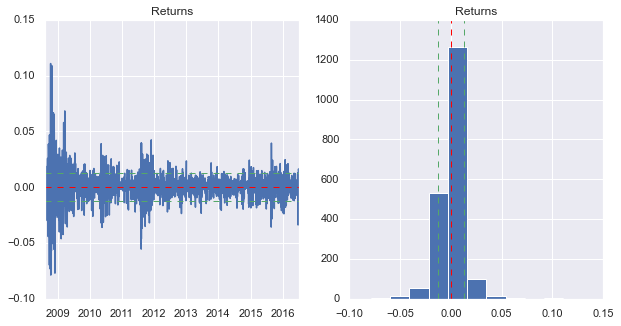

In [230]:
# Let's plot our dataset for daily returns
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(price_returns['Daily_Returns'])
ax1.set_title('Returns')
ax1.axhline(mean_return,color='red',linestyle='dashed',linewidth=1)

# Plot the std lines vertically
ax1.axhline(std_return,color='g',linestyle='dashed',linewidth=1)
ax1.axhline(-std_return,color='g',linestyle='dashed',linewidth=1)
ax2.hist(price_returns['Daily_Returns'])
ax2.set_title('Returns')
ax2.axvline(mean_return,color='red',linestyle='dashed',linewidth=1)

# Plot the std lines horizontally
ax2.axvline(std_return,color='g',linestyle='dashed',linewidth=1)
ax2.axvline(-std_return,color='g',linestyle='dashed',linewidth=1)
plt.show()
# As expected, there is no pattern in the data; randomly distributed around 0

#### Kurtosis of the daily returns:

  - high kurtosis of the return distribution means that returns are greater than the expected
  - Most of the models have assumption that investors prefer stocks with the positive skewness return distribution.
  - Kurtosis measures the degree of a distribution expressed as fat tails.

In [231]:
#kurtosis of the daily returns
kurtosis = price_returns['Daily_Returns'].kurtosis()
kurtosis

10.922377992910823

#### Skewness in stocks
   - Skewness measures the degree of return asymmetry in terms of the probability distribution around the mean.
   - skewness tells us if returns have been extreme or not
   - The mean of positively skewed data will be greater than the median.
   - The mean of negatively skewed data will be less than the median
     - Median:  0.0005431700657254623

In [232]:
#skewness of the daily returns
from scipy.stats import skew
skew = price_returns['Daily_Returns'].skew()
skew

0.15966748278979342

 #### Observation:
     skew : 0.159 is greater than Median: 0.000543

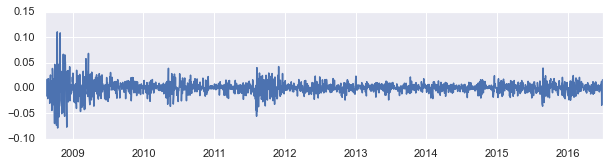

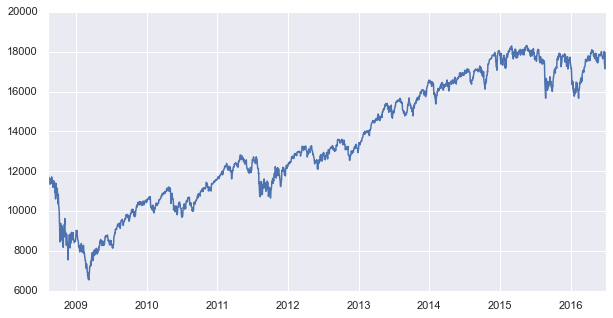

In [233]:
# Plot Daily_Returns and Adj Close, on the same subplot
plt.subplot(2, 1, 1)
plt.plot(price_returns["Daily_Returns"], label="Daily_Returns");
plt.show()
plt.plot(price_returns["Adj Close"], label="Adj Close")
plt.show()
# plt.legend(loc="best", fontsize="small");


#### Plot the time series on individual plots

It can be beneficial to plot individual time series on separate graphs as this may improve clarity and provide more context around each time series in the DataFrame.

It is possible to create a `"grid"` of individual graphs by `"faceting"` each time series by setting the subplots argument to True.

  - explore some of the time series in the price_returns DataFrame and extract some meaningful information from these plots.

                   Close     Volume     Adj Close  Daily_Returns
Date                                                            
2008-08-08  11734.320312  212830000  11734.320312            NaN
2008-08-11  11782.349609  183190000  11782.349609       0.004093
2008-08-12  11642.469727  173590000  11642.469727      -0.011872
2008-08-13  11532.959961  182550000  11532.959961      -0.009406
2008-08-14  11615.929688  159790000  11615.929688       0.007194


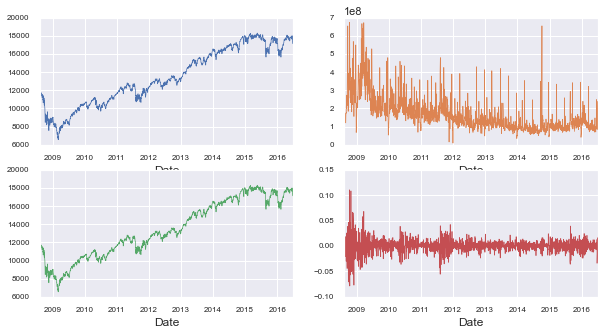

In [234]:
# A subset of the price_returns DataFrame
price_returns_subset = price_returns[['Close', 'Volume', 'Adj Close', 'Daily_Returns']]

# Print the first 5 rows of price_returns_subset
print(price_returns_subset.head(5))

# Create a facetted graph with 2 rows and 2 columns
ax = price_returns_subset.plot(subplots=True,
                    layout=(2, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=8,
                     legend=False);

### Plot monthly and yearly trends
It is possible to directly extract the day, month or year of each date in the index. 
Extract the year of each date in the index using the `.index.year` attribute.
Use the `.groupby()` and `.mean()` methods to compute the mean annual value of each time series in the DataFrame:

#### Daily trend:

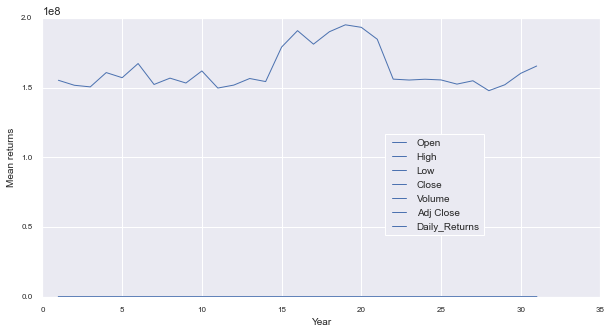

In [235]:
index_daily = price_returns.index.day
price_returns_by_day = price_returns.groupby(index_daily).mean()

# Plot the mean unemployment rate for each year
ax = price_returns_by_day.plot(fontsize=8, linewidth=1, color="b");

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Mean returns', fontsize=10);
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10);

#### Monthly trend:

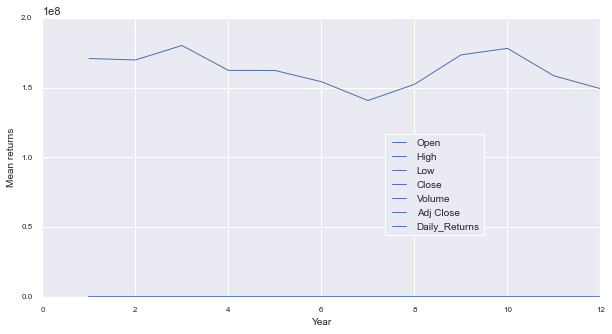

In [236]:
index_month = price_returns.index.month
price_returns_by_month = price_returns.groupby(index_month).mean()

# Plot the mean unemployment rate for each year
ax = price_returns_by_month.plot(fontsize=8, linewidth=1, color="b");

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Mean returns', fontsize=10);
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10);

#### Yearly trend:

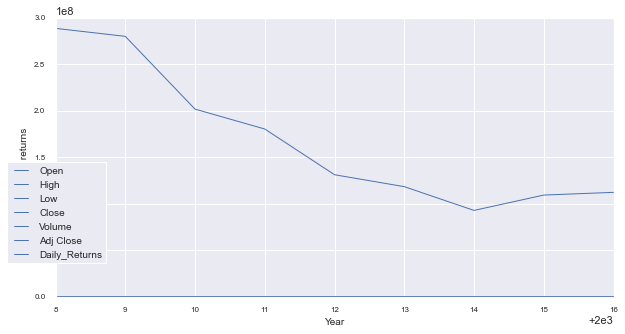

In [237]:
# Extract of the year in each date indices of the price_returns DataFrame
index_year = price_returns.index.year

# Compute the mean unemployment rate for each year
price_returns_by_year = price_returns.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = price_returns_by_year.plot(fontsize=8, linewidth=1, color="b");

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10);
ax.set_ylabel('Mean returns', fontsize=10);
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10);

#### Heatmap of the data

<AxesSubplot:>

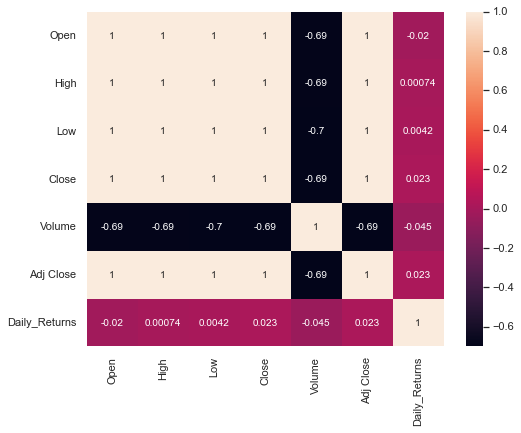

In [238]:
plt.figure(figsize=(8,6))
sns.heatmap(price_returns.corr(), annot=True)


In [239]:
# Compute the correlation between the columns using the pearson method
print(price_returns[['Adj Close', 'Close', 'Volume', "Daily_Returns"]].corr(method='pearson'))

               Adj Close     Close    Volume  Daily_Returns
Adj Close       1.000000  1.000000 -0.694281       0.023023
Close           1.000000  1.000000 -0.694281       0.023023
Volume         -0.694281 -0.694281  1.000000      -0.045062
Daily_Returns   0.023023  0.023023 -0.045062       1.000000


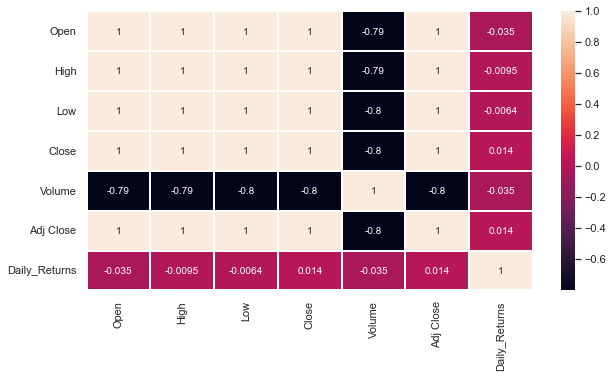

In [240]:
# Get correlation matrix of the DataFrame: price_returns
corr_price_returns = price_returns.corr(method='spearman')

# Customize the heatmap of the corr_price_returns correlation matrix
sns.heatmap(corr_price_returns,
           annot=True,
           linewidths=0.4,
           annot_kws={'size': 10});

plt.xticks(rotation=90);
plt.yticks(rotation=0);


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Adj Close'}>],
       [<AxesSubplot:title={'center':'Daily_Returns'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

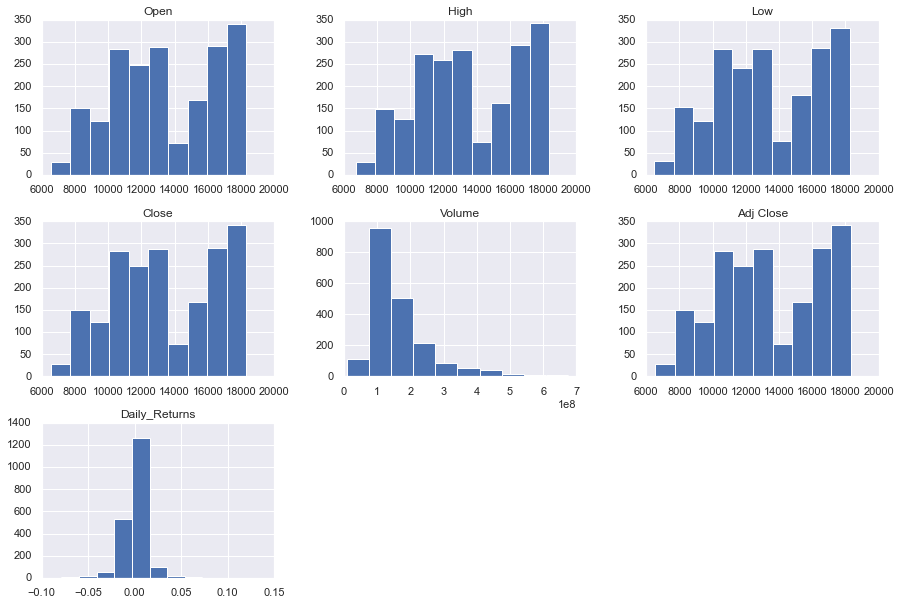

In [241]:
# Generate a histogram
price_returns.hist(figsize=(15,10))

#### Plot the rolling annual return

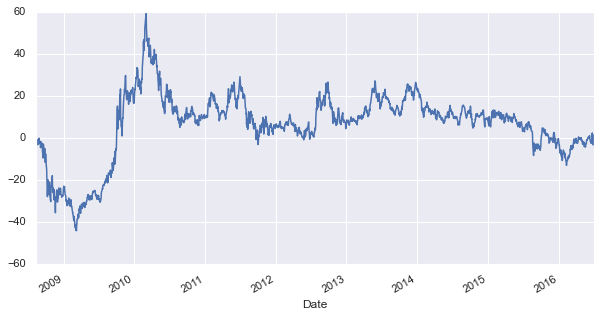

In [242]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

# Calculate daily returns
daily_returns = price_returns["Adj Close"].pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot();

#### Smoothing:

 Calculating a rolling window statistic with Pandas. We first use the dot-rolling method of our dataframe, which returns an object that can be used to calculate many different statistics within each window. The window parameter tells us how many timepoints to include in each window. The larger the window, the smoother the result will be.
 
Now, let's plot our dataset for `Adj Close` price with the moving averages this time
Calculating Moving Average with lag of `100`, `200` and `365` days.

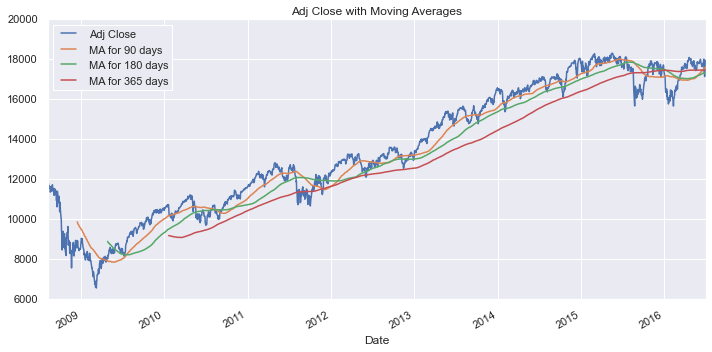

In [243]:
#rolling mean to smooth the signal.
ma_day = [90, 180, 365]

for ma in ma_day:
    column_name = f'MA for {ma} days'
    price_returns[column_name] = price_returns['Adj Close'].rolling(ma).mean()

price_returns[['Adj Close', 'MA for 90 days', 'MA for 180 days', 'MA for 365 days']].plot()
plt.title('Adj Close with Moving Averages');
plt.tight_layout()

 
 
 
 - As we increase the MA window size, data gets smoother as expected
The 2015–2016 stock market selloff was the period of decline in the value of stock prices globally that occurred between June 2015 to June 2016.

#### Plot the 90 and 360 day rolling average

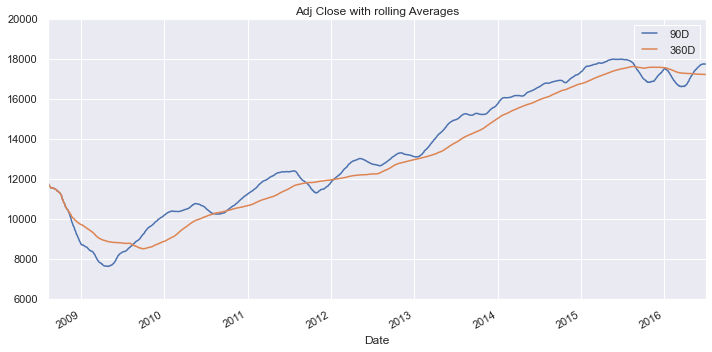

In [244]:
# Calculate 90d and 360d rolling mean for the last price

price_returns['90D'] = price_returns['Adj Close'].rolling('90D').mean()
price_returns['360D'] = price_returns['Adj Close'].rolling('360D').mean()

df2 = pd.DataFrame(price_returns, columns=["90D", "360D"])
df2.apply(np.abs).plot()
plt.title('Adj Close with rolling Averages');
plt.tight_layout()

# Plot data
#price_returns.loc['2008'].plot(columns=["90D", "360D"], title='Rolling mean Adj Close');

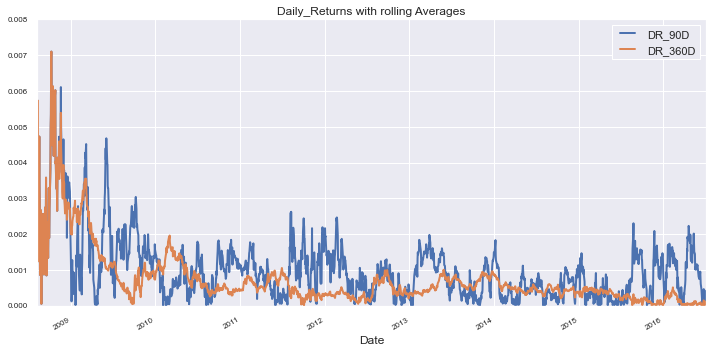

In [245]:
# Calculate 90d and 360d rolling mean for the last price

price_returns['DR_90D'] = price_returns['Daily_Returns'].rolling('90D').mean()
price_returns['DR_360D'] = price_returns['Daily_Returns'].rolling('360D').mean()

df3 = pd.DataFrame(price_returns, columns=["DR_90D", "DR_360D"])
df3.apply(np.abs).plot(fontsize=8, linewidth=2)
plt.title('Daily_Returns with rolling Averages');
plt.tight_layout()

#### Rectification and smoothing independently


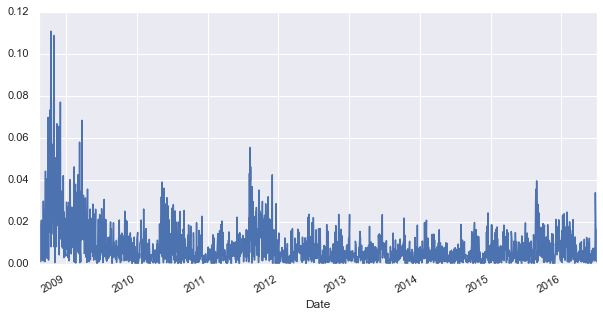

In [246]:
# Rectify the price_returns.
#Plot the result.
price_rectified1 = price_returns["Daily_Returns"].apply(np.abs)
price_rectified1.plot(figsize=(10, 5))
plt.show()

#### Plot the correlations:
We can see that there is indeed auto-correlation with the prices and their lagged values. The ACF shows values outside the confidence bands around 0 indicating variable autocorrelation.

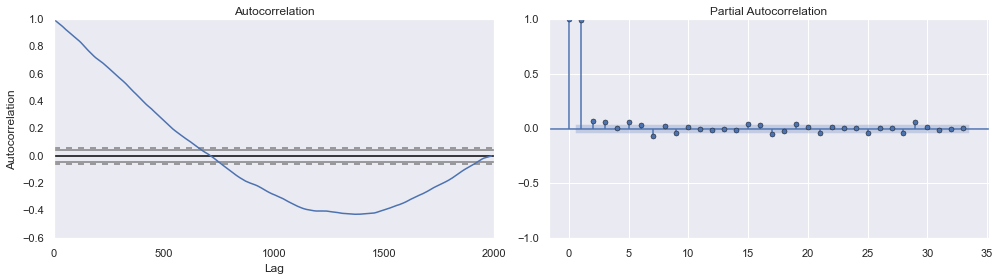

In [247]:
# Let's also review the Autocorrelation and Partial Autocorrelation plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
autocorrelation_plot(price_returns['Adj Close'], ax = ax1)
ax1.set_title('Autocorrelation')
plot_pacf(price_returns['Adj Close'], ax = ax2)
plt.tight_layout()

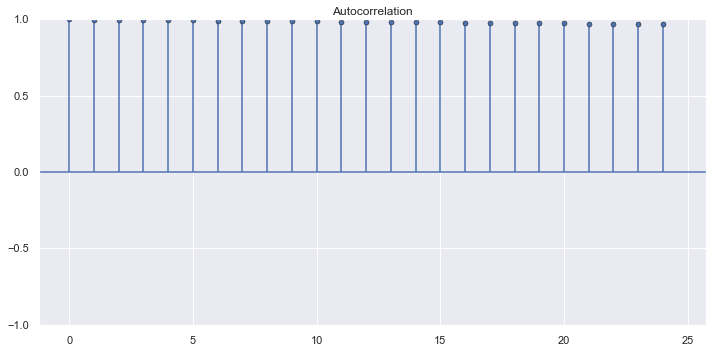

In [248]:

#Plot the autocorrelation function of the data and alpha=1 to suppress the confidence interval
plot_acf(price_returns['Adj Close'], lags=24, alpha=1)
plt.tight_layout()

#### Are We Confident This Stock is Mean Reverting ?

 - We will compute the actual and approximate confidence interval for the ACF, and compare it to the lag-one autocorrelation of `-0.10`
 - Set `alpha=0.05` for the confidence intervals (that's the default) and `lags=20`

In [249]:
# Compute the percentage change of prices
returns1 = price_returns["Adj Close"].pct_change().dropna()

#Recompute the autocorrelation of weekly returns in the Series 'Adj Close' in the returns DataFrame.
autocorrelation1 = returns1.autocorr()

print('The auto correlation of weekly returns is %4.2f' % (autocorrelation1))

The auto correlation of weekly returns is -0.10


In [250]:
# Compute the percentage change of prices
returns2 = price_returns["Daily_Returns"].pct_change().dropna()

#Recompute the autocorrelation of weekly returns in the Series 'Adj Close' in the returns DataFrame.

autocorrelation2 = returns2.autocorr()
print('The auto correlation of weekly returns is %4.2f' % (autocorrelation))

The auto correlation of weekly returns is -0.10


The auto correlation of daily returns is -0.10
The approximate confidence interval is +/- 0.04


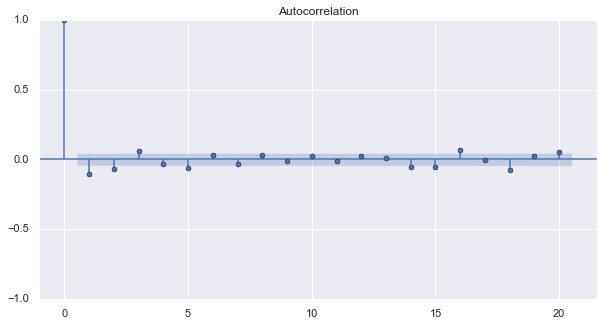

In [251]:
# Compute the percentage change of prices
from math import sqrt
#Recompute the autocorrelation of weekly returns in the Series 'Adj Close' in the returns DataFrame.
returns1 = price_returns["Adj Close"].pct_change().dropna()

autocorrelation1 = returns1.autocorr()
print('The auto correlation of daily returns is %4.2f' % (autocorrelation1))

#Find the number of observations in the returns DataFrame using the len() function.
nobs = len(returns1)

#Approximate the 95% confidence interval of the estimated autocorrelation.
#The math function sqrt() has been imported and can be used.
conf = 1.95 / sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

#Plot the autocorrelation function of returns using plot_acf that was imported from statsmodels.
#Set alpha=0.05 for the confidence intervals (that's the default) and lags=20.
plot_acf(returns1, lags=20, alpha=0.05)
plt.show()

#### Observation: 
 
Notice that the autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero

### Checking White Noise

 - For a Gaussian white noise process, the mean and standard deviation describe the entire process.
 - argument for the mean is loc and the argument for the standard deviation is scale.
 - A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed.
 - Stock returns are often modeled as white noise. 

The mean is 0.000 and the standard deviation is 0.013


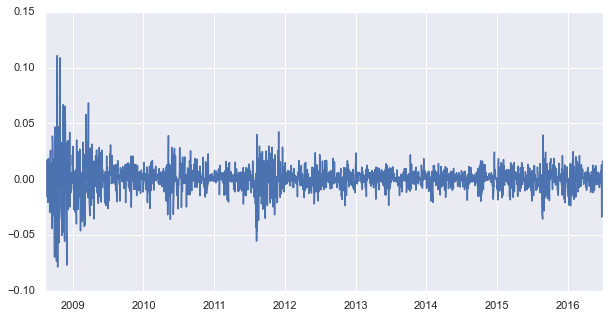

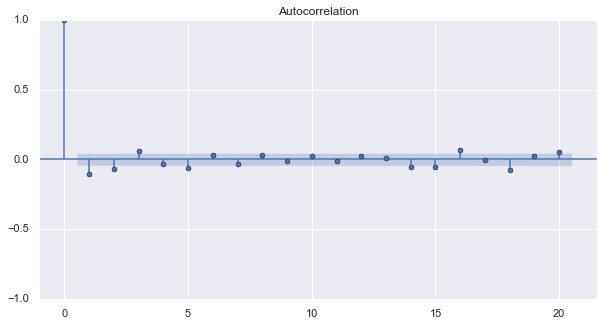

In [252]:
# Generate 1000 random normal returns 'noise = np.random.normal(loc=0.02, scale=0.05, size=1000)' 
#with mean 2% (0.02) and standard deviation 5% (0.05),

np.random.normal(loc=0.02, scale=0.05, size=1000)

# Verify the mean and standard deviation of returns using np.mean() and np.std().
mean = np.mean(returns1)
std = np.std(returns1)

# Plot the time series.
plt.plot(returns1)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

# Plot the autocorrelation function using plot_acf with lags=20.
plot_acf(returns1, lags=20)
plt.show()

#### Observation : 
 Notice that for a white noise time series, all the autocorrelations are close to zero.

#### Random Walk - P-value

   - In a random walk, today's price is equal to yesterday's price plus some noise
   - The change in price of a random walk is just White Noise

In [253]:
# Import the adfuller module from statsmodels.
from statsmodels.tsa.stattools import adfuller
# Run the Augmented Dickey-Fuller test on the series of closing stock prices, which is the column 'Adj Close'.
results1 = adfuller(price_returns["Adj Close"])

# Print out just the p-value of the test (results[0] is the test statistic, and results[1] is the p-value).
print("test statistic : "  + str(results1[0]))
print("p-value : "  + str(results1[1]))

test statistic : -0.3747127512973435
p-value : 0.9142360000847218


#### Observation:
    According to this test, we cannot reject the hypothesis that `price_returns` follow a random walk. The p-value : 0.914 
    is greater than 0.05

#### Generate a Random Walk

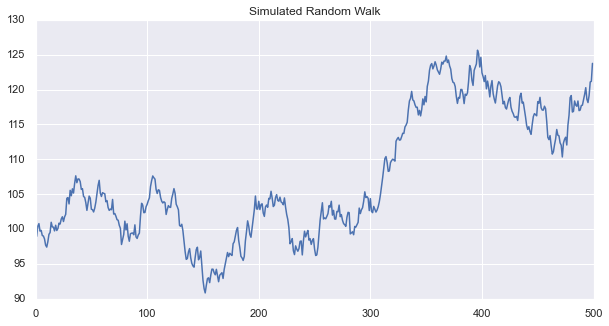

In [254]:
# Generate 500 random normal "steps" with mean=0 and standard deviation=1 using np.random.normal(), 
#where the argument for the mean is loc and the argument for the standard deviation is scale.
steps = np.random.normal(loc=0, scale=1, size= 500)
# Set first element to 0 so that the first price will be the starting stock price
steps[0] = 0

# Simulate stock prices P:
   # Cumulate the random steps using the numpy .cumsum() method
   # Add 100 to P to get a starting stock price of 100.
P = 100 + np.cumsum(steps)

# Plot the simulated random walk
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

#### Random walk with a drift
 
   - stock prices, are random walks but tend to drift up over time
   - When adding noise, we may theoretically get negative prices. Now we will make the noise multiplicative: 
        - add one to the random, normal changes to get a total return, and multiply that by the last price.

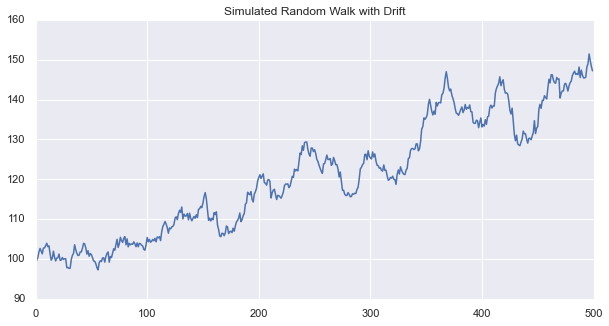

In [255]:
# Generate 500 random normal multiplicative "steps" with mean 0.1% and standard deviation 1% using np.random.normal(),
#which are now returns, and add one for total return.
steps = np.random.normal(loc=0.001, scale=.01, size=500) + 1
steps[0]=1
# Simulate stock prices P:
  # Cumulate the product of the steps using the numpy .cumprod() method.
  # Multiply the cumulative product of total returns by 100 to get a starting value of 100.
P = 100 * np.cumprod(steps)
# Plot the simulated random walk with drift.
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

## `DJIA_df ` Stock news Exploration

#### Plot the Adj Close index price and the Label columns

<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

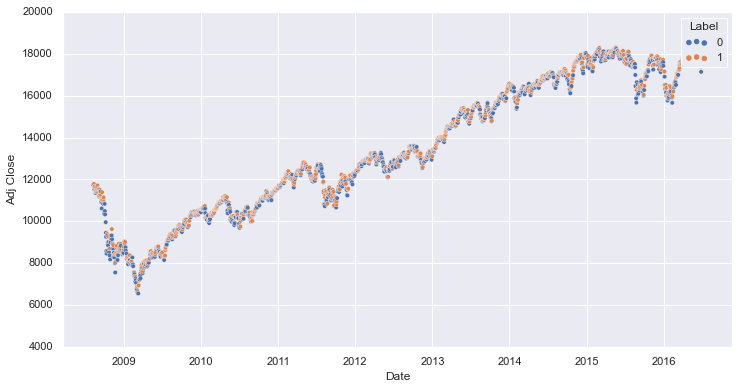

In [256]:
#let's plot the Adj Close index price and the Label columns as hue
# We can see that the Label (movement of increase/descrease) in the time-series data
plt.figure(figsize=(12,6))
sns.scatterplot(data=DJIA_df, x=DJIA_df.index, y='Adj Close', hue='Label')

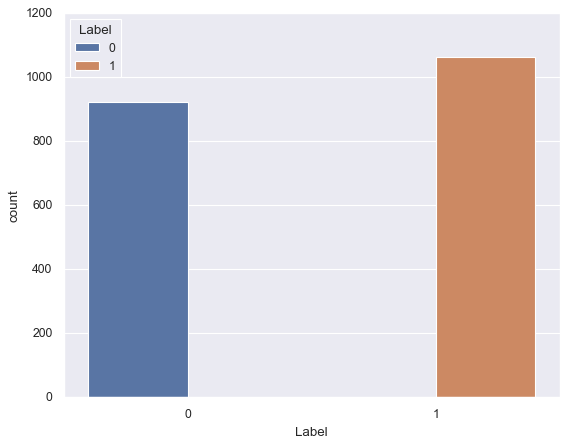

In [257]:
#plot the `Label`
plt.style.use('classic')
sns.set()
ax = sns.countplot(x='Label', hue='Label', data=DJIA_df)

 - `Label "1"` is when DJIA `Adj Close` value has been risen or stayed as the same.
 
 - `Label "0"` is when DJIA `Adj Close` value decreased

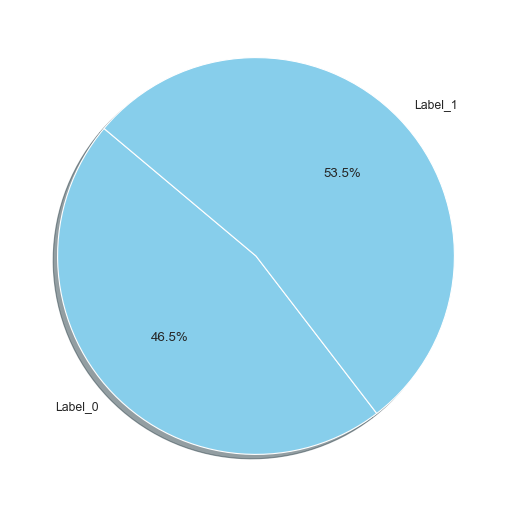

In [258]:
fig = plt.figure(figsize = (8,8))
colors = ["skyblue"]
Label_0 = DJIA_df[DJIA_df['Label'] == 0 ]
Label_1 = DJIA_df[DJIA_df['Label'] == 1 ]

count = [Label_0['Label'].count(), Label_1['Label'].count()]
pie = plt.pie(count, labels = ['Label_0', 'Label_1'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 140,
              )
plt.show()


#### Observation: 
    There are 53.5% data value has been risen or stayed as the same and 46.5% has been decreased.

In [265]:
import os
datapath = '.'
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [266]:
datapath_combdata = os.path.join(datapath, 'DJIA_df.csv')
if not os.path.exists(datapath_combdata):
    DJIA_df.to_csv(datapath_combdata, index='Date')

#### Wrangling summary of News data and Stock Price:

 - Removal of Punctuation:
    - Removed all the punctuation from News data set.

 - Tokenizing:
    - With Tokenizing process, the data has been splitted into a list of words using Regular Expressions.

 - Stop words:
    - removed the unnecessary stop words. 
    
 - Lemmatization / Stemming:
     - Shorten words to their root stems. The main purpose is to reduce variations of the same word, thereby reducing the corpus of words we include in the model. 

 - Adjusted Closing Price:
     - Stock values are stated in terms of the closing price and the adjusted closing price.
     - There are 1986 observations (rows) and 32 features (columns) including one Label feature starting 2008 to 2016

#### EDA summary of News data and stock Price:

 - Autocorrelation:
      - The autocorrelation of returns for stock `Adj Close` is negative, so the stock is `'mean reverting'` and close to zero.
        - The auto correlation of daily returns is -0.10
        - The approximate confidence interval is +/- 0.04

 - Statistical summary:
      - Determining the risk an investment poses is standard deviation. Low standard deviation means prices are calm, so investments come with low risk.
          - Standard Deviation:  0.0126499
          - Mean:  0.0002937
          - Median:  0.00054317
          
 - Kurtosis of the daily returns:
    - High kurtosis of the return distribution means that returns are greater than the expected.
    - Most of the models have assumption that investors prefer stocks with the positive skewness return distribution.
        - Kurtosis = 10.92

 - Skewness in stocks:
    - Skewness measures the degree of return asymmetry in terms of the probability distribution around the mean. Skewness tells us if returns have been extreme or not
    - The mean of positively skewed data will be greater than the median.
         - skew : 0.159 is greater than Median: 0.000543
 
 - Smoothing:
     - Used dot-rolling method of dataframe, which returns an object that can be used to calculate many different statistics within each window. The window parameter tells us how many timepoints to include in each window. The larger the window, the smoother the result will be.

 - Stock is Mean Reverting:
    - The actual and approximate confidence interval for the ACF, and compared it to the lag-one autocorrelation of -0.10.
       - The autocorrelation with lag 1 is significantly negative, but none of the other lags are significantly different from zero

 - White Noise:
    - Stock returns are often modeled as white noise.
       -  For a white noise time series, all the autocorrelations are close to zero.

 - Random Walk - P-value
    - In a random walk, today's price is equal to yesterday's price plus some noise.
      - According to this test, we cannot reject the hypothesis that `price_returns` follow a random walk. The p-value : 0.914 
is greater than 0.05
    

#### References:

https://www.analyticsvidhya.com/blog/2021/12/text-classification-of-news-articles/#h2_34

https://towardsdatascience.com/nlp-in-python-data-cleaning-6313a404a470